# Actividad 14 - Dimensionalidad y Agrupación

### Integrantes Grupo:

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip





### Desafío 1: Preparación del ambiente de trabajo

Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas de álbumes.
* Las imágenes se encuentran en una carpeta con el nombre album_covers
* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .
El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de
colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
* sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
* skimage.io : Para poder ingresar y leer imágenes.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

### Desafío 2: Importación de imagenes

* Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?
* Para visualizar la imágen en el notebook, ocupe io.imshow .

In [15]:
imgn = io.imread('Image from iOS.png')
print('Tipo:\t', type(imgn))
print('Shape:\t', imgn.shape)
imgn

Tipo:	 <class 'imageio.core.util.Array'>
Shape:	 (512, 436, 4)


Array([[[209, 234, 255, 255],
        [209, 234, 255, 255],
        [209, 234, 255, 255],
        ...,
        [ 64,  69,  75, 255],
        [225, 237, 249, 255],
        [213, 232, 249, 255]],

       [[209, 234, 255, 255],
        [209, 234, 255, 255],
        [209, 234, 255, 255],
        ...,
        [ 82,  87,  93, 255],
        [203, 215, 227, 255],
        [215, 234, 251, 255]],

       [[209, 234, 255, 255],
        [209, 234, 255, 255],
        [209, 234, 255, 255],
        ...,
        [106, 111, 117, 255],
        [177, 189, 201, 255],
        [217, 236, 251, 255]],

       ...,

       [[243, 243, 243, 255],
        [243, 243, 243, 255],
        [243, 243, 243, 255],
        ...,
        [179, 179, 179, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[243, 243, 243, 255],
        [243, 243, 243, 255],
        [243, 243, 243, 255],
        ...,
        [255, 255, 255, 255],
        [249, 249, 249, 255],
        [255, 255, 255, 255]],

       [[243

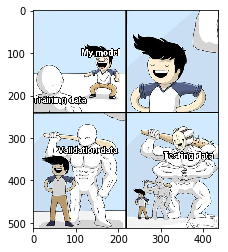

In [17]:
plt.imshow(imgn) # visualizar la imagen

### Desafío 3: Preprocesamiento de imágenes y KMeans

* Con la representación numérica de la imagen, vamos a extraer la altura, el ancho y la cantidad de canales mediante shape .
* Posteriormente redimensionaremos la imagen con reshape .
* Realize una clusterización usando el algoritmo KMeans con k=8 , ¿Qué significará esto?
* Vuelva a implementar el modelo, pero usando MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?

In [19]:
h, w, dims = imgn.shape
df = pd.DataFrame( imgn.reshape(h*w, dims))
df.head()

,0,1,2,3
0,209,234,255,255
1,209,234,255,255
2,209,234,255,255
3,209,234,255,255
4,209,234,255,255


In [20]:
clf_km = KMeans(n_clusters = 8)
clf_km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
clf_km.cluster_centers_

array([[252.43984297, 251.6635062 , 249.63364237, 255.        ],
       [ 56.90011891,  59.00152879,  62.24002038, 255.        ],
       [201.09443113, 222.09833324, 242.47290819, 255.        ],
       [170.37046803, 161.11193144, 145.04693474, 255.        ],
       [  2.54120807,   2.87775157,   3.17616614, 255.        ],
       [ 97.33264729, 102.57782351, 114.52289684, 255.        ],
       [209.71379709, 234.10663942, 254.26092751, 255.        ],
       [213.47620862, 211.36325193, 206.85290868, 255.        ]])

In [23]:
pd.DataFrame(clf_km.cluster_centers_).head(10)

,0,1,2,3
0,252.439843,251.663506,249.633642,255.0
1,56.900119,59.001529,62.240020,255.0
2,201.094431,222.098333,242.472908,255.0
3,170.370468,161.111931,145.046935,255.0
4,2.541208,2.877752,3.176166,255.0
5,97.332647,102.577824,114.522897,255.0
6,209.713797,234.106639,254.260928,255.0
7,213.476209,211.363252,206.852909,255.0


### Desafío 4: Extracción de valores

* Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
* Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .



In [24]:
clf_km.labels_.shape

(223232,)

In [8]:
clf_km.predict(df)

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [9]:
(clf_km.labels_ - clf_km.predict(df)).sum()

0

In [10]:
center_id, counts = np.unique(clf_km.labels_, return_counts= True)
pd.DataFrame({'center_id':center_id, 'counts':counts})

,center_id,counts
0,0,67540
1,1,5887
2,2,57057
3,3,7586
4,4,7775
5,5,15263
6,6,26255
7,7,35869


### Desafío 5: Conversión rgb a hex

Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [29]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [30]:
hex_centers = list(map(rgb_to_hex, clf_km.cluster_centers_))
hex_centers

['#fcfbf9',
 '#383b3e',
 '#c9def2',
 '#aaa191',
 '#020203',
 '#616672',
 '#d1eafe',
 '#d5d3ce']

### Desafío 6: Definición de base

Ahora generaremos un DataFrame con las siguientes variables:
* El color hex .
* La ocurrencia del color en cada pixel count .
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .
* Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [31]:
df_hex = pd.DataFrame({'hex_id':hex_centers,
                       'percentage': 100*counts/counts.sum()})

df_hex = df_hex.sort_values(by='percentage', ascending='False')

df_hex

,hex_id,percentage
1,#383b3e,2.637167
3,#aaa191,3.398258
4,#020203,3.482924
5,#616672,6.837281
6,#d1eafe,11.761307
7,#d5d3ce,16.068037
2,#c9def2,25.559508
0,#fcfbf9,30.255519


### Desafío 7: Visualización
Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

<BarContainer object of 8 artists>

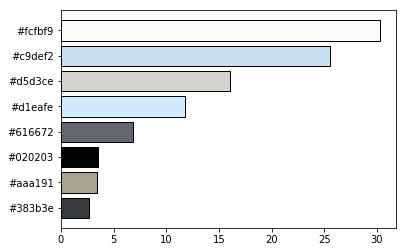

In [34]:
plt.barh(df_hex.hex_id, df_hex.percentage, color=df_hex.hex_id, edgecolor='k')


### Bonus point: Envuelva todo en una función

In [37]:
def plot_kmeans_colors(img_path, n_centers=8):
    imgn = io.imread(img_path)
    h, w, dims = imgn.shape
    clf_km = KMeans(n_clusters = n_centers).fit(imgn.reshape(h*w, dims))
    center_id, counts = np.unique(clf_km.labels_, return_counts= True)
    hex_centers = list(map(rgb_to_hex, clf_km.cluster_centers_))
    
    df_hex = pd.DataFrame({'hex_id':hex_centers, 'percentage': counts/counts.sum()})
    df_hex = df_hex.sort_values(by='percentage', ascending='False')
    
    fig = plt.figure()
    fig.set_size_inches(12,4)
    plt.subplot(1,2,1)
    plt.imshow(imgn)
    plt.subplot(1,2,2)
    plt.barh(df_hex.hex_id, df_hex.percentage, color=df_hex.hex_id, edgecolor='k')
    plt.tight_layout()
    plt.show()

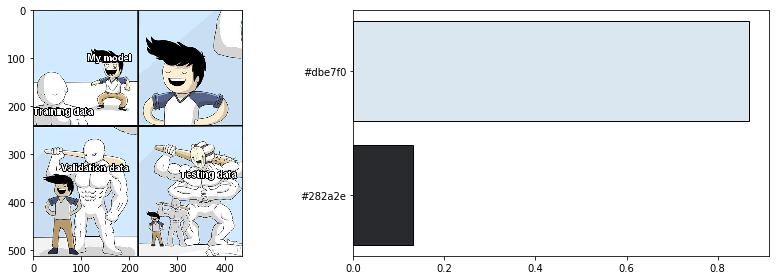

In [38]:
plot_kmeans_colors('Image from iOS.png', 2)

jamie-xx-in-colour.jpeg


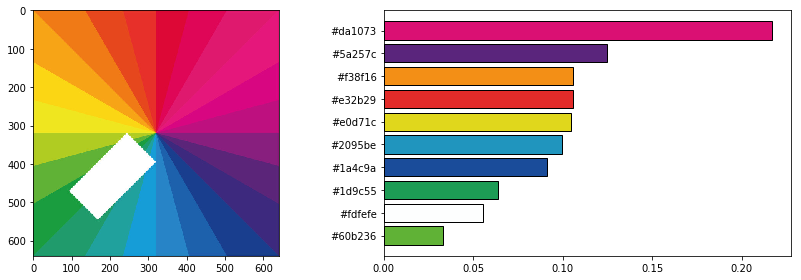

haken-aquarius.jpg


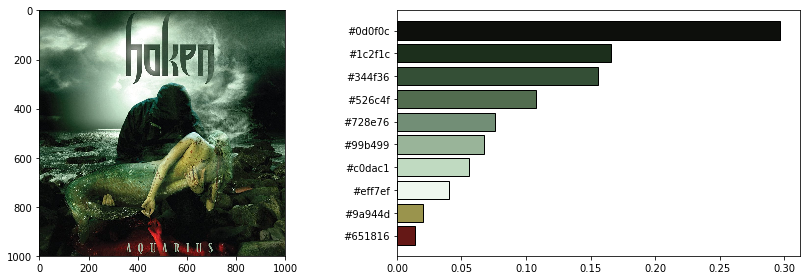

britney-spears-baby-one-more-time.jpg


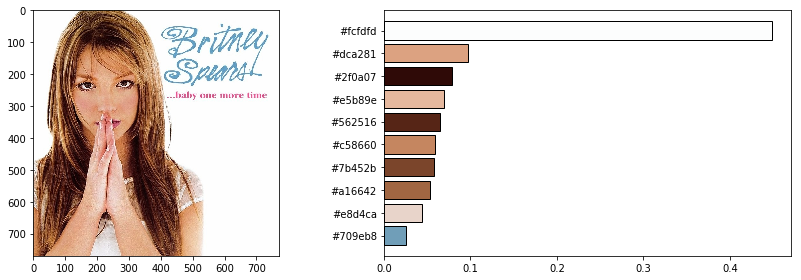

lauryn-hill-the-miseducation-of-lauryn-hill.jpg


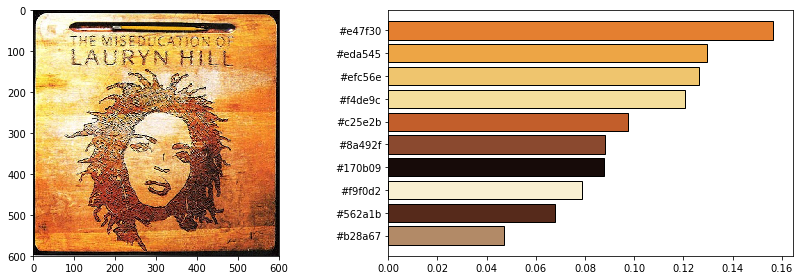

deltron-3030-self-titled.jpg


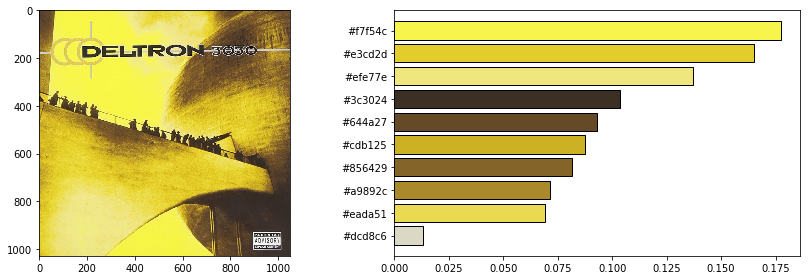

car-bomb-meta.jpg


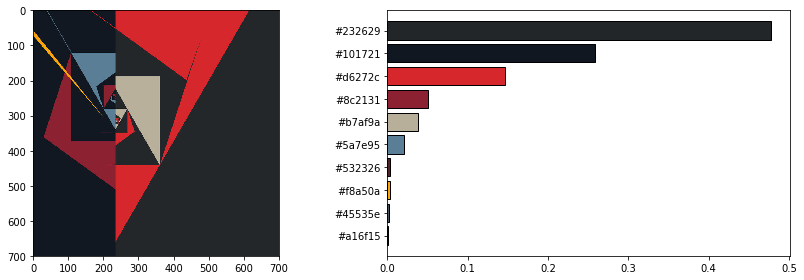

cloudkicker-let-yourself-be-huge.jpg


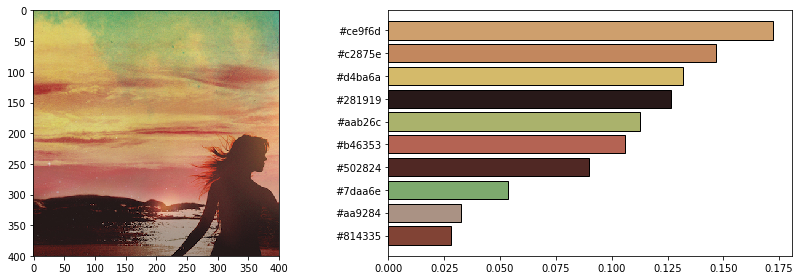

avalanches-since-i-left-you.jpg


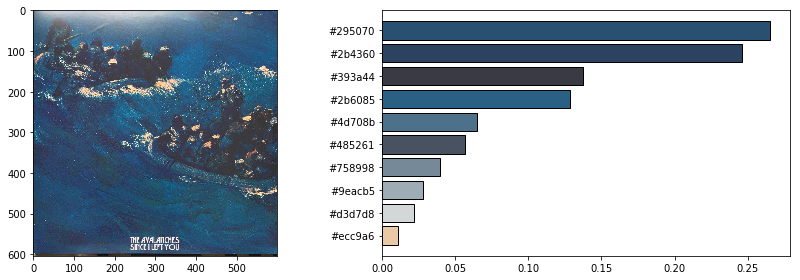

kendric-lamar-to-pimp-a-butterfly.jpg


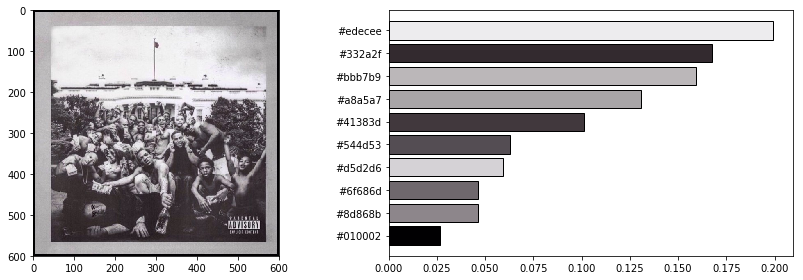

alt-j-this-is-all-yours.jpg


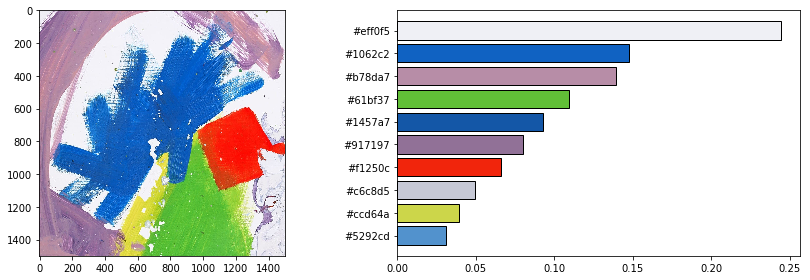

jon-hopkins-immunity.jpg


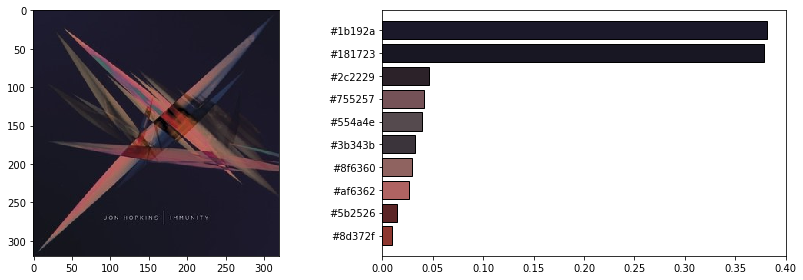

immolation-close-to-a-world-below.jpg


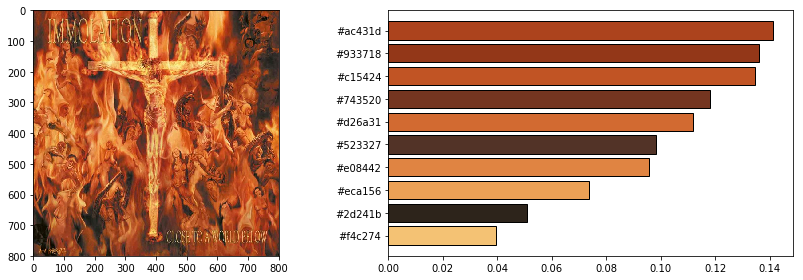

the_weakerthans-reconstruction_site-frontal.jpg


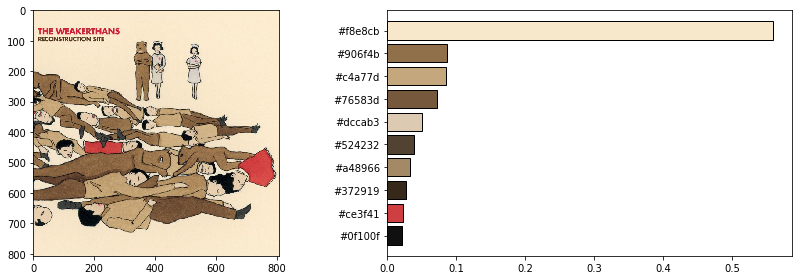

dua-lipa-self-titled.jpeg


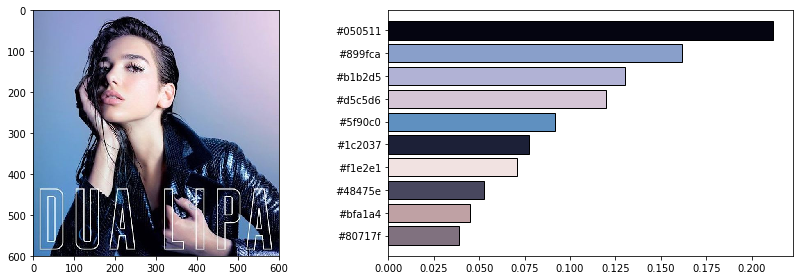

de-la-soul-3-feets-and-rising.jpg


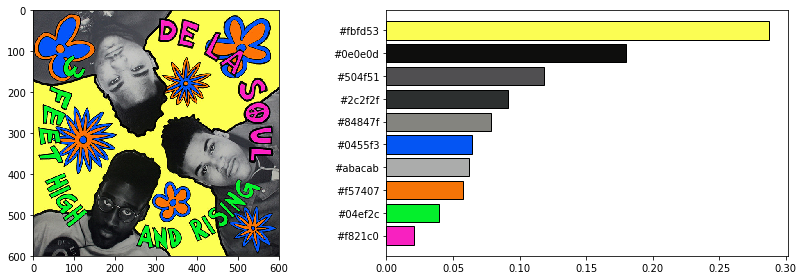

nsync-self-titled.jpg


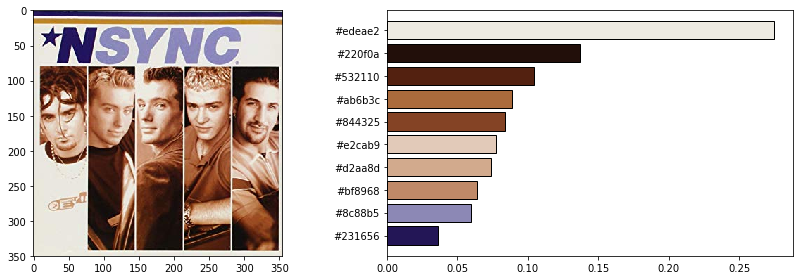

big-krit-4eva-is-a-mighty.webp


ValueError: Could not find a format to read the specified file in mode 'i'

In [40]:
import os
nc=10
for _, _, file_list in os.walk('album_covers'):
    for f in file_list:
        print(f)
        plot_kmeans_colors('album_covers/'+f, nc)